In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# 1. Load Data

In [2]:
df = pd.read_csv('pseudo_sigmoid_batches_long.csv')

In [3]:
df

,batch,data_point,value
0,Batch_1,0,0.031108
1,Batch_1,1,0.073149
2,Batch_1,2,0.000000
3,Batch_1,3,0.000000
4,Batch_1,4,0.075847
...,...,...,...
19995,Batch_20,995,0.972519
19996,Batch_20,996,0.997452
19997,Batch_20,997,0.986163
19998,Batch_20,998,0.987074


In [4]:
df = df.rename(columns = {'value':'Signal', 'data_point':'Volume', 'batch':'Batch'})
#df_final = df_final[df_final["Batch"] == "Batch_1"]
df


,Batch,Volume,Signal
0,Batch_1,0,0.031108
1,Batch_1,1,0.073149
2,Batch_1,2,0.000000
3,Batch_1,3,0.000000
4,Batch_1,4,0.075847
...,...,...,...
19995,Batch_20,995,0.972519
19996,Batch_20,996,0.997452
19997,Batch_20,997,0.986163
19998,Batch_20,998,0.987074


# 2. Preprocess data

In [5]:
from preprocessing import process_dataframe

In [6]:
results = process_dataframe(df,batch_col='Batch', signal_col='Signal', 
                      window_length=201, polyorder=2, num_smoothing_passes=2,
                      smoothed_col_name='smoothed_signal', 
                      normalized_col_name='normalized_signal',
                      derivative_col_name='first_derivative')

In [7]:
results

,Batch,Volume,Signal,smoothed_signal,normalized_signal,first_derivative
0,Batch_1,0,0.031108,0.015863,0.001596,-0.000074
1,Batch_1,1,0.073149,0.015791,0.001521,-0.000074
2,Batch_1,2,0.000000,0.015720,0.001448,-0.000072
3,Batch_1,3,0.000000,0.015651,0.001377,-0.000070
4,Batch_1,4,0.075847,0.015584,0.001308,-0.000068
...,...,...,...,...,...,...
19995,Batch_20,995,0.972519,0.988831,0.999779,0.000055
19996,Batch_20,996,0.997452,0.988885,0.999834,0.000055
19997,Batch_20,997,0.986163,0.988939,0.999889,0.000055
19998,Batch_20,998,0.987074,0.988993,0.999944,0.000055


In [8]:
from plots import plot_processed_dataframe

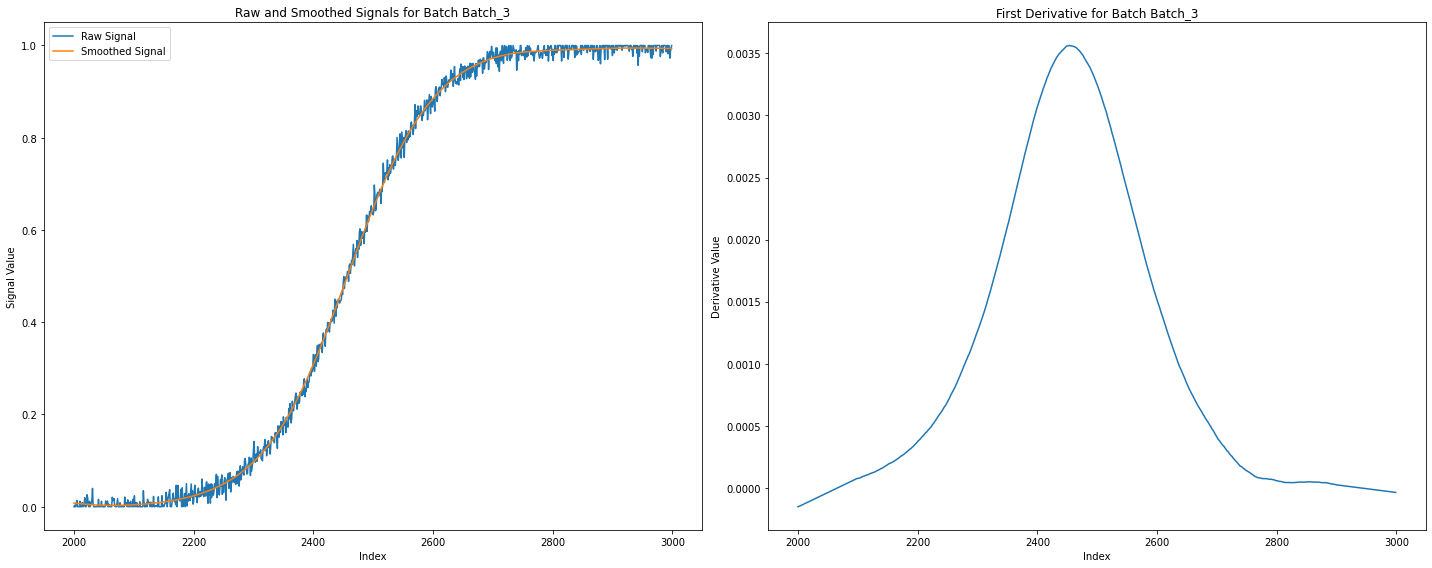

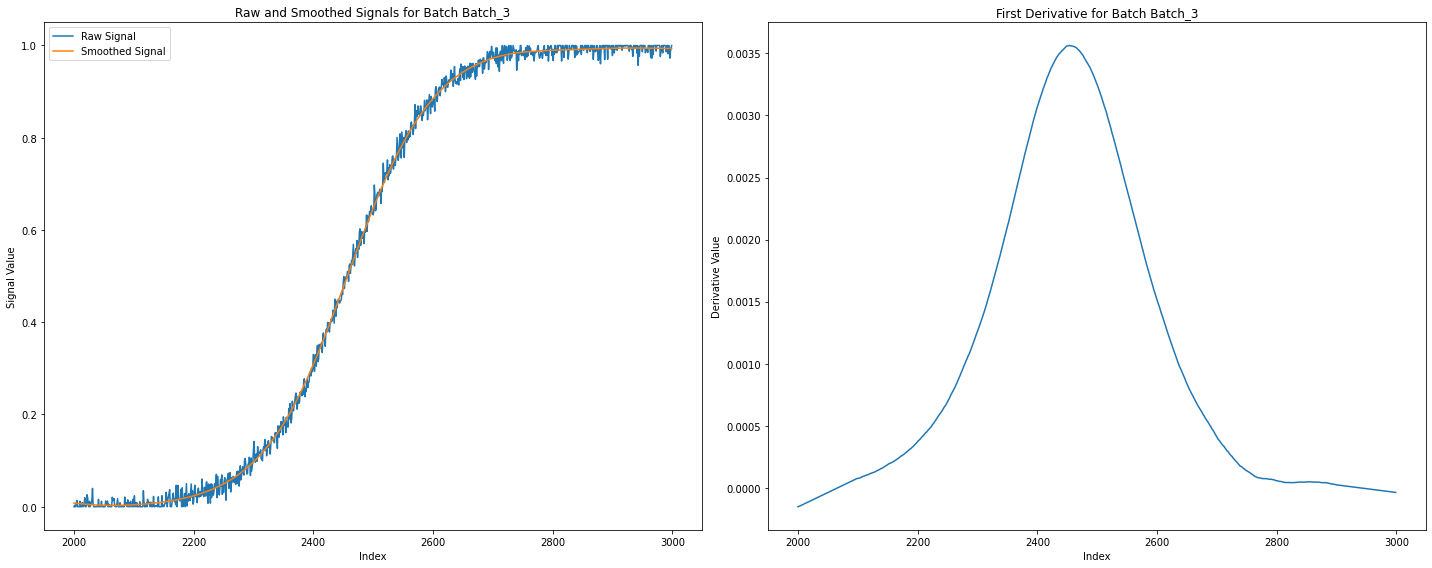

In [9]:
plot_processed_dataframe(results, 'Batch', 'Signal', 'smoothed_signal', 'first_derivative', 'Batch_3')

# 3. Metrics

In [10]:
from metrics import calculate_metrics
from metrics import calculate_control_limits

In [11]:
metrics = calculate_metrics(results, volume_col="Volume", signal_col="normalized_signal", deriv_col="first_derivative", batch_col='Batch')
metrics

,Batch,Direct AF,Transwidth,Inflection Points,Max Rate of Change
0,Batch_1,0.968798,389.873749,10,0.002071
1,Batch_2,0.981219,381.103683,10,0.002613
2,Batch_3,0.994186,399.224724,3,0.002286
3,Batch_4,0.976491,387.898004,4,0.002345
4,Batch_5,1.014621,383.544649,1,0.002573
5,Batch_6,1.006143,403.333411,2,0.002253
6,Batch_7,1.006406,383.573760,4,0.002782
7,Batch_8,0.988934,383.945596,9,0.002079
8,Batch_9,0.995684,391.726183,6,0.002427
9,Batch_10,0.997641,395.203182,3,0.002179


In [12]:
control_limits = calculate_control_limits(metrics)
control_limits

,Metric,Mean,LCL,UCL
0,Direct AF,0.995663,0.953350,1.037976
1,Transwidth,391.294766,368.633152,413.956381
2,Inflection Points,4.250000,-3.768892,12.268892
3,Max Rate of Change,0.002345,0.001528,0.003161


# 4. Control Charts

In [13]:
from plots import create_control_charts

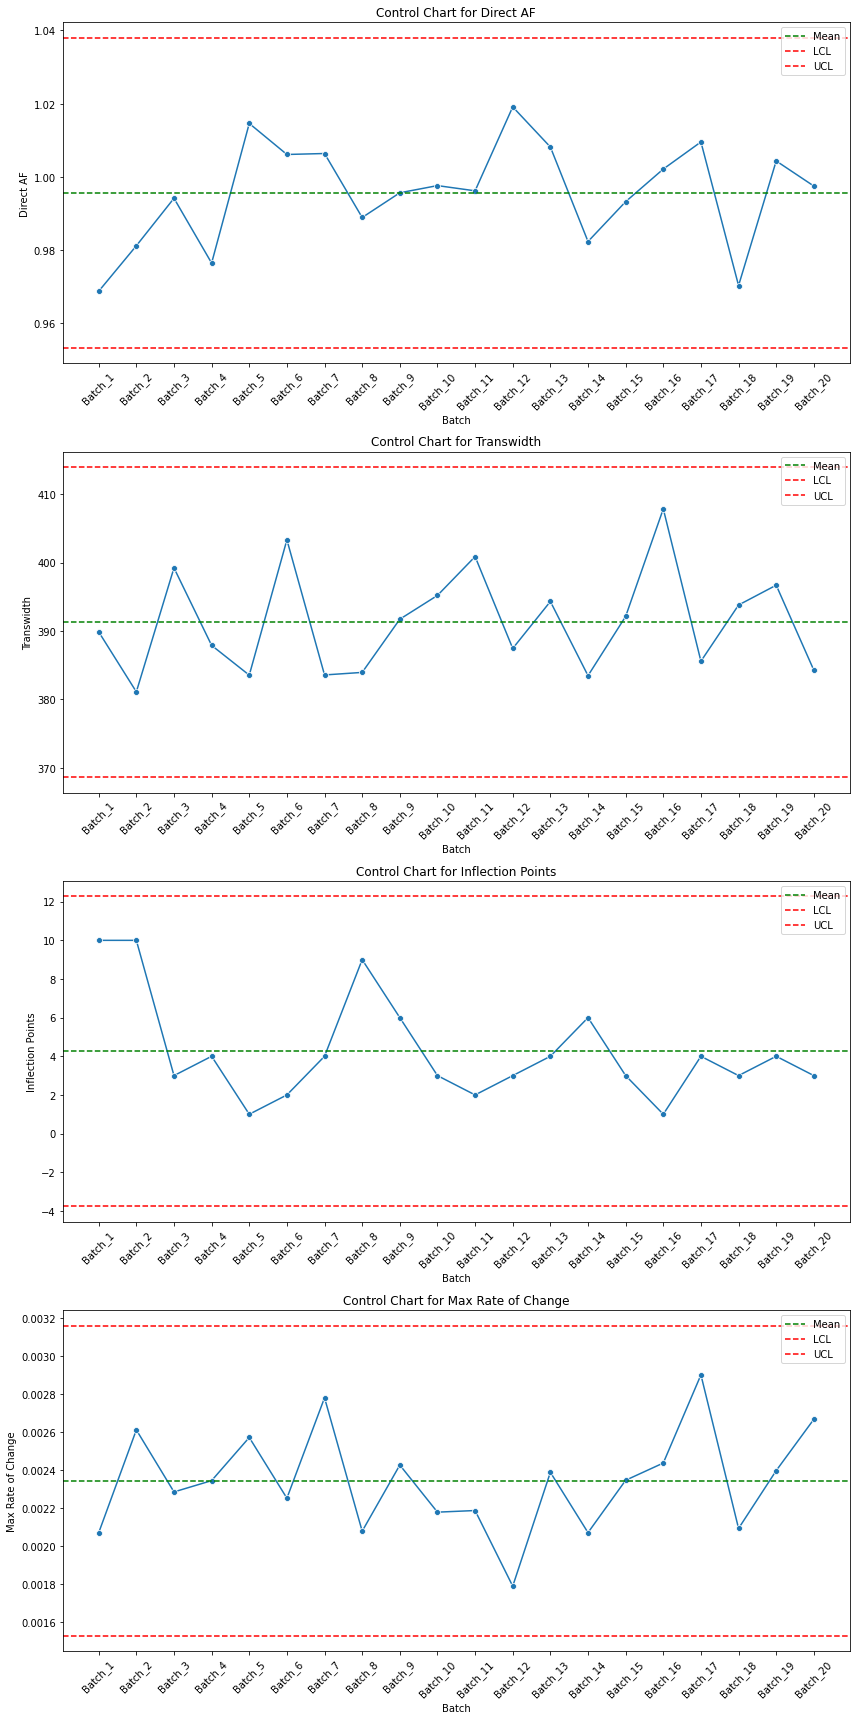

In [14]:
create_control_charts(metrics_df=metrics, control_limits_df=control_limits)

# 5. Exploratory Plots

In [15]:
def plot_signal(df, volume_col, signal_col, batch_col):
    
    plt.figure(figsize=(12, 12))
    sns.lineplot(data=df, x=volume_col, y=signal_col, hue=batch_col, alpha=0.5)
    plt.show()

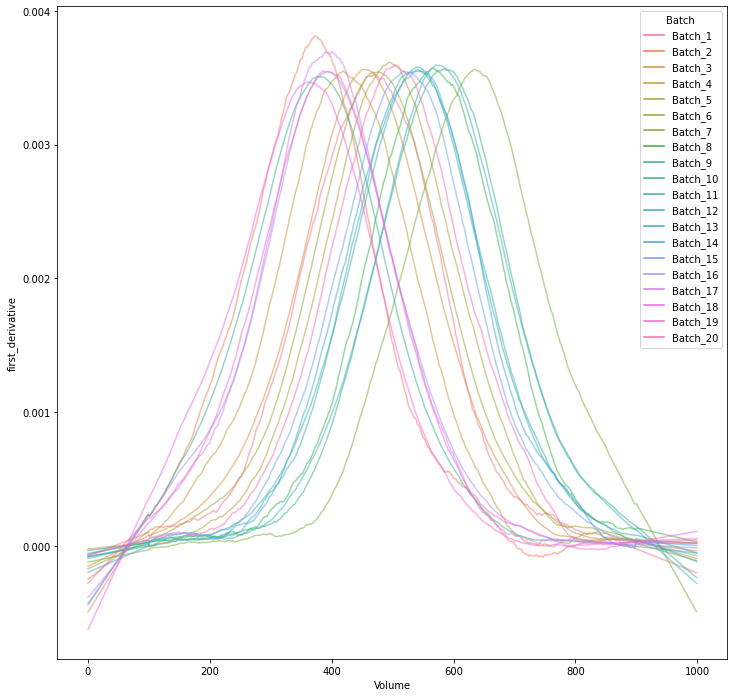

In [16]:
plot_signal(results, 'Volume', 'first_derivative', 'Batch')

In [17]:
from plots import plot_transwidth

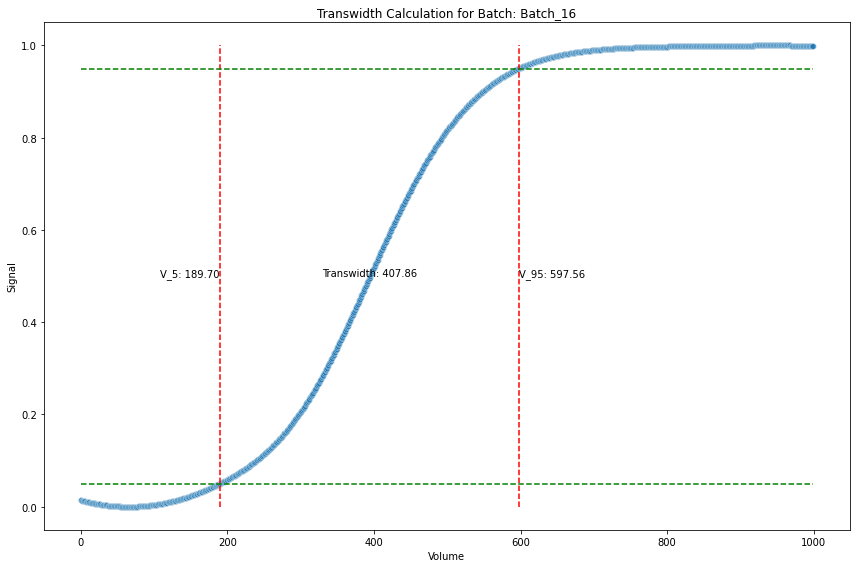

In [18]:

plot_transwidth(results, volume_col="Volume", signal_col="normalized_signal", batch_col="Batch", batch="Batch_16")

In [19]:
from plots import plot_direct_af

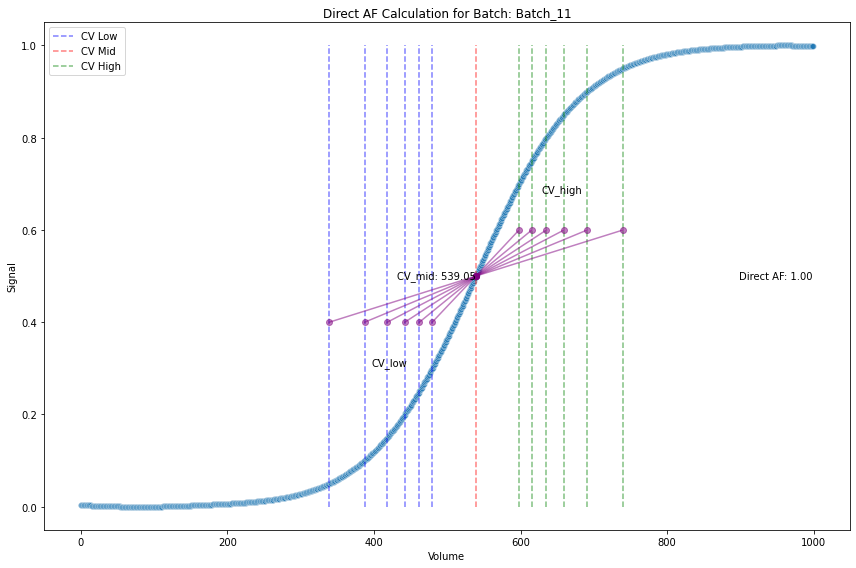

In [20]:
plot_direct_af(results, volume_col="Volume", signal_col="normalized_signal", batch_col="Batch", batch="Batch_11")

In [21]:
from plots import plot_inflection_points

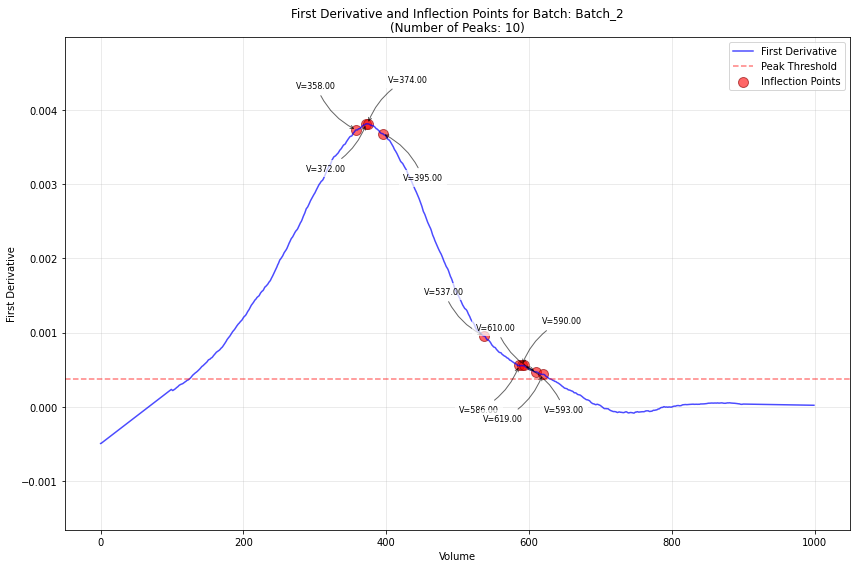

In [22]:
plot_inflection_points(df=results, volume_col="Volume", deriv_col="first_derivative", batch_col="Batch", batch="Batch_2")

In [23]:
from plots import plot_max_rate_of_change

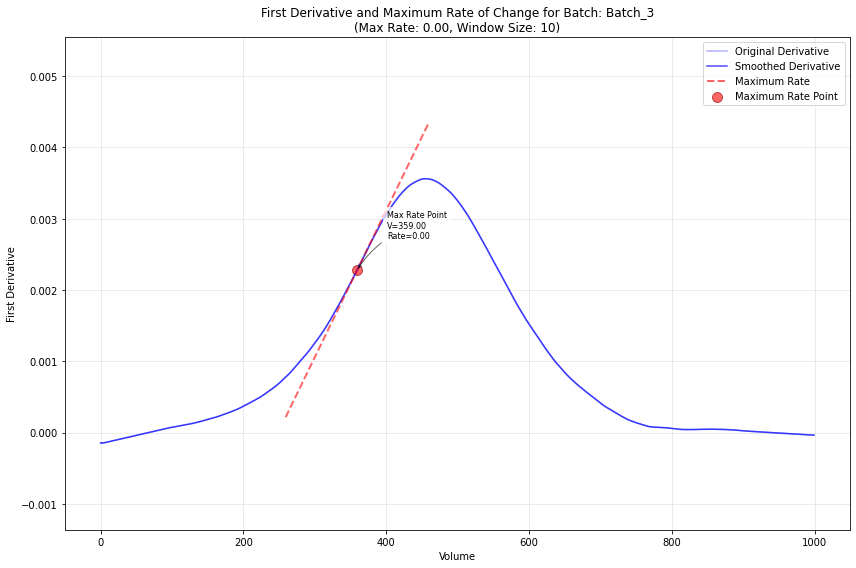

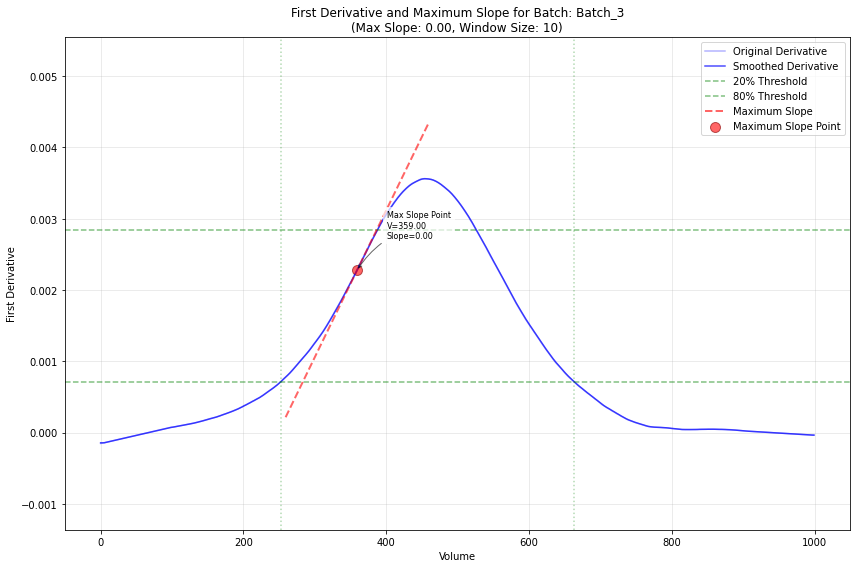

In [24]:
plot_max_rate_of_change(df=results, volume_col="Volume", deriv_col="first_derivative", batch_col="Batch", batch="Batch_3")